# Evaluando modelos de Machine Learning

In [1]:
#Importaciones
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Preparamos dataset

In [2]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()

df_stroke = pd.read_csv('datasets/healthcare-dataset-stroke-data.csv')
df_stroke['age']=df_stroke['age'].round(0).astype(int)



#Reemplazamos nulos
df_stroke.fillna(df_stroke.mean(),inplace=True);
df_stroke.isnull().values.any();
df_stroke.isnull().sum;



Creamos nuevas variables

In [3]:
# Comorbilidades (más de una condición médica)
df_stroke['comorbidities'] = df_stroke[['hypertension', 'heart_disease', 'stroke']].sum(axis=1)

# Grupos de edades:
df_stroke['age_group'] = pd.cut(df_stroke['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])

# Niveles de actividades en función de la profesión y la residencia
conditions = [    (df_stroke['work_type'] == 'Never_worked') | (df_stroke['work_type'] == 'children'),
    (df_stroke['work_type'] == 'Self-employed') & (df_stroke['Residence_type'] == 'Rural'),
    (df_stroke['work_type'] == 'Self-employed') & (df_stroke['Residence_type'] == 'Urban'),
    (df_stroke['work_type'] == 'Private') & (df_stroke['Residence_type'] == 'Rural'),
    (df_stroke['work_type'] == 'Private') & (df_stroke['Residence_type'] == 'Urban'),
    (df_stroke['work_type'] == 'Govt_job') & (df_stroke['Residence_type'] == 'Rural'),
    (df_stroke['work_type'] == 'Govt_job') & (df_stroke['Residence_type'] == 'Urban')
]

values = [1, 2, 3, 2, 3, 2, 3]

df_stroke['activity_level_residence'] = np.select(conditions, values)

df_stroke.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,comorbidities,age_group,activity_level_residence
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,2,60-70,3
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,1,60-70,2
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,2,70-80,2
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,1,40-50,3
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,2,70-80,2


Comprobamos tipos de datos de cada columna

In [4]:
cats = list(df_stroke.select_dtypes(include=['object','bool']) )
nums = list(df_stroke.select_dtypes(include=['int64','float64']))
print(cats)
print(nums)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
['id', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke', 'comorbidities']


### Previa anterior, usamos todos los valores del dataset y los normalizamos y numerizamos

In [5]:
# Clasificamos datos para el encoding
encoder = []
onehot = []

for col in cats:
   if len(df_stroke[col].unique()) == 2:
        encoder.append(col)
   else:
        onehot.append(col)

print(encoder)
print(onehot)

['ever_married', 'Residence_type']
['gender', 'work_type', 'smoking_status']


In [6]:
df_labencoded = df_stroke.copy()

for col in encoder:
    df_labencoded[col] = df_labencoded[col].astype('category').cat.codes
df_labencoded.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,comorbidities,age_group,activity_level_residence
0,9046,Male,67,0,1,1,Private,1,228.69,36.600000,formerly smoked,1,2,60-70,3
1,51676,Female,61,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1,1,60-70,2
2,31112,Male,80,0,1,1,Private,0,105.92,32.500000,never smoked,1,2,70-80,2
3,60182,Female,49,0,0,1,Private,1,171.23,34.400000,smokes,1,1,40-50,3
4,1665,Female,79,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1,2,70-80,2


In [7]:
# Comprobamos la correlación de las features con el target
df_labencoded.corr().round(2)

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,comorbidities,activity_level_residence
id,1.00,0.00,0.00,-0.00,0.01,-0.00,0.00,0.00,0.01,0.00,0.01
age,0.00,1.00,0.28,0.26,0.68,0.01,0.24,0.33,0.25,0.41,0.49
hypertension,0.00,0.28,1.00,0.11,0.16,-0.01,0.17,0.16,0.13,0.73,0.09
heart_disease,-0.00,0.26,0.11,1.00,0.11,0.00,0.16,0.04,0.13,0.60,0.07
ever_married,0.01,0.68,0.16,0.11,1.00,0.01,0.16,0.34,0.11,0.20,0.42
Residence_type,-0.00,0.01,-0.01,0.00,0.01,1.00,-0.00,-0.00,0.02,0.00,0.62
avg_glucose_level,0.00,0.24,0.17,0.16,0.16,-0.00,1.00,0.17,0.13,0.24,0.08
bmi,0.00,0.33,0.16,0.04,0.34,-0.00,0.17,1.00,0.04,0.14,0.33
stroke,0.01,0.25,0.13,0.13,0.11,0.02,0.13,0.04,1.00,0.59,0.08
comorbidities,0.00,0.41,0.73,0.60,0.20,0.00,0.24,0.14,0.59,1.00,0.13


In [8]:
df = df_stroke.drop(['id'], axis=1)
nums.remove('id')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,comorbidities,age_group,activity_level_residence
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,2,60-70,3
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,1,60-70,2
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,2,70-80,2
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,1,40-50,3
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,2,70-80,2


Borramos outliers

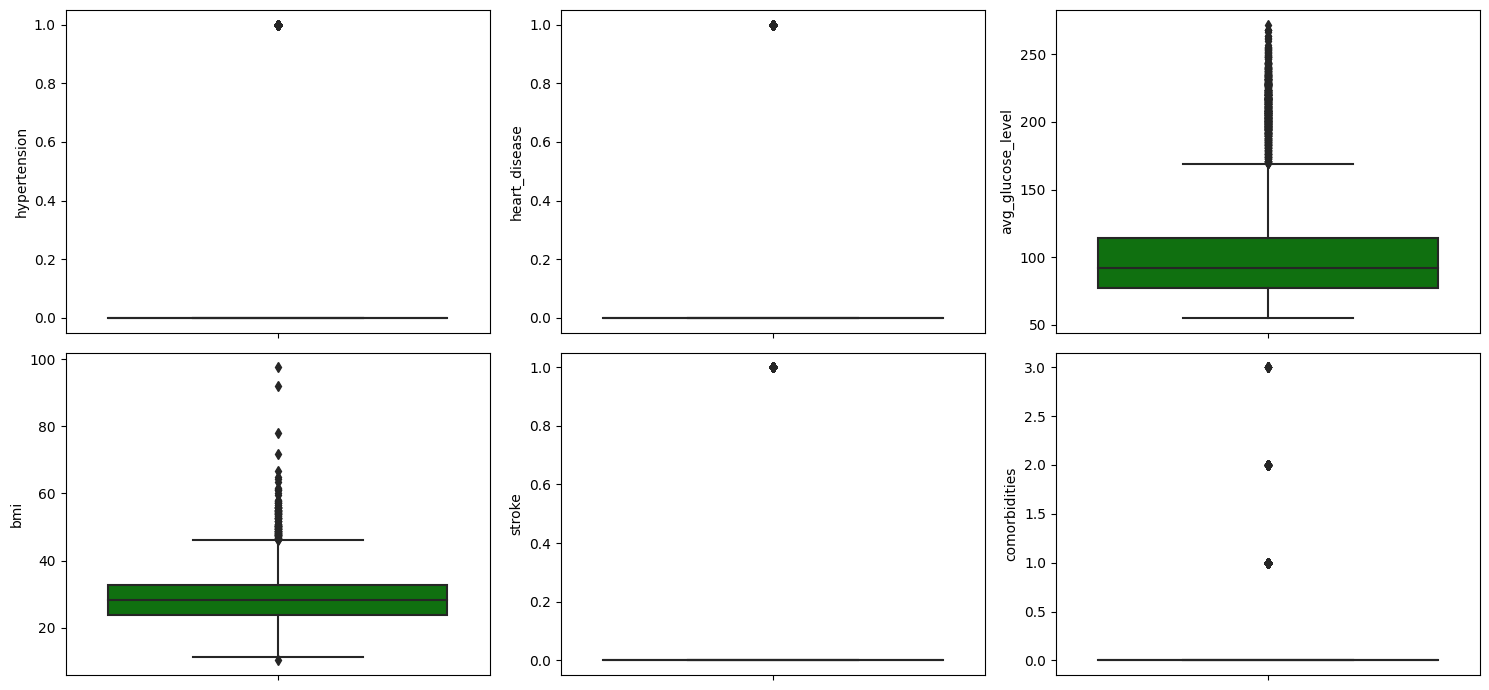

In [9]:
plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[nums[i]],color='green',orient='v')
    plt.tight_layout()

In [10]:
outlier = ['avg_glucose_level', 'bmi']

In [11]:
# Calcula el valor del primer cuartil (25%)
Q1 = df[outlier].quantile(0.25)

# Calcula el valor del tercer cuartil (75%)
Q3 = df[outlier].quantile(0.75)

# Calcula la amplitud intercuartílica (IQR)
IQR = Q3 - Q1

# Selecciona solo las filas del dataframe que no tengan valores de la variable "outlier"
# por debajo del límite inferior (Q1 - 1.5*IQR) o por encima del límite superior (Q3 + 1.5*IQR)
# any(axis=1) indica que se deben eliminar las filas que tengan al menos un valor de "outlier"
# dentro de los límites establecidos
df = df[~((df[outlier]<(Q1-1.5*IQR))|(df[outlier]>(Q3+1.5*IQR))).any(axis=1)]

# Reinicia el índice del dataframe para que sea consecutivo
df.reset_index(drop=True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,comorbidities,age_group,activity_level_residence
0,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,2,70-80,2
1,Male,74,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1,3,70-80,2
2,Female,69,0,0,No,Private,Urban,94.39,22.800000,never smoked,1,1,60-70,3
3,Female,59,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1,1,50-60,2
4,Female,78,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1,1,70-80,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4386,Female,80,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,1,70-80,3
4387,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,0,80-90,3
4388,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,0,30-40,2
4389,Male,51,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,0,50-60,2


Convertimos columnas categóricas a numéricas

In [12]:
# onehot encoding para categóricas
df = pd.get_dummies(df)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,comorbidities,activity_level_residence,gender_Female,gender_Male,...,age_group_0-10,age_group_10-20,age_group_20-30,age_group_30-40,age_group_40-50,age_group_50-60,age_group_60-70,age_group_70-80,age_group_80-90,age_group_90-100
2,80,0,1,105.92,32.500000,1,2,2,0,1,...,0,0,0,0,0,0,0,1,0,0
6,74,1,1,70.09,27.400000,1,3,2,0,1,...,0,0,0,0,0,0,0,1,0,0
7,69,0,0,94.39,22.800000,1,1,3,1,0,...,0,0,0,0,0,0,1,0,0,0
8,59,0,0,76.15,28.893237,1,1,2,1,0,...,0,0,0,0,0,1,0,0,0,0
9,78,0,0,58.57,24.200000,1,1,3,1,0,...,0,0,0,0,0,0,0,1,0,0


## Modelado

Pasos previos

In [13]:
# Importaciones:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from IPython.display import display
from sklearn.metrics import precision_score, recall_score, f1_score

In [14]:
# separamos feature y target
X = df.drop(columns = ['stroke'])
y = df['stroke']

Dividir los datos en conjunto de entrenamiento y conjunto de prueba

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

Realizar la normalización de las variables numéricas

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Realizar oversampling usando la técnica SMOTE (Synthetic Minority Over-sampling Technique)

In [17]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

Definir una lista de modelos

In [18]:
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Neural Network', MLPClassifier(random_state=42))
]

Entrenar y evaluar cada modelo

In [19]:
import pandas as pd

# Crear una lista para guardar los resultados de cada modelo
results = []

# Entrenar y evaluar cada modelo
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
    df_report = pd.DataFrame(report).transpose()
    results.append([name, acc, precision, recall, f1, df_report])

# Convertir la lista de resultados en un DataFrame
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Classification Report'])

# Ordenar los modelos por F1 score
df_results = df_results.sort_values(by='F1 score', ascending=False)

# Mostrar la tabla de resultados
pd.set_option('display.max_colwidth', None)
display(df_results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score']])


,Model,Accuracy,Precision,Recall,F1 score
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000
2,Decision Tree,1.000000,1.000000,1.000000,1.000000
4,Gradient Boosting,1.000000,1.000000,1.000000,1.000000
5,Neural Network,1.000000,1.000000,1.000000,1.000000
3,Random Forest,0.976109,0.833333,0.454545,0.588235
1,K-Nearest Neighbors,0.947668,0.385965,0.666667,0.488889


## PCA

In [20]:
from sklearn.decomposition import PCA

# Creamos un objeto PCA con 2 componentes
pca = PCA(n_components=2)

# Ajustamos y transformamos los datos con PCA
X_pca = pca.fit_transform(X)

# Obtenemos las cargas de los dos primeros componentes
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)

# Imprimimos las variables más relevantes en el primer componente
print("Variables más relevantes en el primer componente:")
print(loadings['PC1'].abs().sort_values(ascending=False).head())

# Imprimimos las variables más relevantes en el segundo componente
print("\nVariables más relevantes en el segundo componente:")
print(loadings['PC2'].abs().sort_values(ascending=False).head())


Variables más relevantes en el primer componente:
age                         0.727764
avg_glucose_level           0.680257
bmi                         0.083490
activity_level_residence    0.012096
ever_married_Yes            0.010618
Name: PC1, dtype: float64

Variables más relevantes en el segundo componente:
avg_glucose_level           0.732963
age                         0.674820
bmi                         0.082620
activity_level_residence    0.010910
ever_married_Yes            0.010183
Name: PC2, dtype: float64


### Conclusiones PCA

Según los resultados, podemos observar que las variables más relevantes en el primer componente son: age, avg_glucose_level y bmi. Esto significa que estas variables tienen una fuerte influencia en la creación del primer componente y es probable que expliquen gran parte de la variabilidad de los datos. Además, la variable activity_level_residence y ever_married_Yes también tienen una influencia positiva en el primer componente, aunque menor.

Por otro lado, en el segundo componente, las variables más relevantes son: avg_glucose_level, age y bmi. Es interesante ver que estas variables también aparecen en el primer componente y sugiere que estas tres variables tienen una fuerte influencia en la variabilidad de los datos.

En general, podemos concluir que age, avg_glucose_level y bmi son las variables más importantes para explicar la variabilidad de los datos y que estas tres variables están altamente correlacionadas entre sí. También es interesante notar que activity_level_residence y ever_married_Yes tienen una influencia menor pero aún son importantes en la creación del primer componente.